<h1 align = center> <font color = "69D305">Logistic Regression from scratch</h1>

#### What is Logistic Regression ?

Logistic regression is a classification algorithm used to predict the probability of a binary outcome (e.g., yes or no, 0 or 1). It is a popular choice for binary classification problems, such as spam filtering, cancer diagnosis, and predicting customer churn.

The main idea behind logistic regression is to model the probability of the outcome variable (y) as a function of the input features (x). The logistic function, also known as the sigmoid function, is used to transform the linear regression output into a probability between 0 and 1.

Logistic regression can be implemented using various optimization algorithms, such as gradient descent or Newton's method, to find the optimal coefficients (weights) that maximize the likelihood of the observed data.

In summary, logistic regression is a popular algorithm for binary classification problems, used to model the probability of a binary outcome based on input features.

#### How does Logistic Regression work?

- Choose a suitable optimization algorithm (e.g., gradient descent) to minimize the negative log-likelihood of the observed data.
- Initialize the coefficients (weights) randomly.
- Update the coefficients iteratively using the gradient descent algorithm to minimize the negative log-likelihood.
- Repeat the update process until the coefficients converge to a local optimum or a sufficiently low negative log-likelihood.
- Predict the probability of the outcome variable for new input features using the coefficients.

#### When To Use This?

- When you have a binary classification problem with a limited number of training examples.
- When you want to model the probability of a binary outcome based on input features.
- When you need to handle large datasets efficiently.
- When you want to improve the accuracy of predictions by using logistic regression.

#### Model Evaluation

- Calculate the accuracy of the trained model on a separate test set.
- Use confusion matrices, precision, recall, and F1-score to evaluate the model's performance.
- Compare the performance of different logistic regression models using appropriate evaluation metrics.

#### Difference between Logistic Regression and Linear Regression

- Logistic regression is used for binary classification problems, while linear regression is used for regression problems.
- Logistic regression models the probability of the outcome variable, while linear regression models the relationship between the outcome variable and the input features.
- Logistic regression assumes a linear relationship between the input features and the log-odds of the outcome variable.
- Linear regression can be used as a baseline model for logistic regression, as it can provide a simple interpretation of the coefficients.




<h1 align = center> <font color = "DFCF0A">Sigmoid Functions</font></h1>

The most prominent Sigmoid function is the so-called Logistic function which was developed by Pierre Francois Verhulst to model population grown. It's mathematically described via this formula:

$$
\text{f}(x) = \frac{1}{1 + e^{-x}}
$$




### Implementation

In [57]:
import numpy as np
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


### There are many different Sigmoid Functions and some of them are given below:

- **Hyperbolic Tangent Function (tanh)**: This function is similar to the logistic function, but it has a range of (-1, 1) instead of (0, 1).

Formula:

$$
\tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}
$$


- **Arctangent Function** : The arctangent function, arctan(x), is similar to the logistic function in that it maps real numbers to a limited range. The arctangent function has a range of (−𝜋2,𝜋2)(− 2π , 2π ).

Formula:

$$
f(x) = \arctan (x)
$$


<h2 align = center><font color = "3D5CE7"> From Linear Regression to Logistic Regression </font></h2>

Now we know the mapping capibilities of Sigmoid function , we can wrap Multiple Linear Regression model inside of it to convert output value in range 0 to 1. As we know Multiple Linear Regression Equation look like:

$$
y = \beta_1 x_1 + ... + \beta_n x_n + b
$$

Wrapping this in Sigmoid function (we use sigma to represent the Sigmoid function) results in the following:

$$
y = \sigma(\beta_1 x_1 + ... + \beta_n x_n + b)
$$


<h2 align = center> <font color = "A5AA06"> Implementation

The first thing we need to do is to implement the underlying Multiple Linear Regression model. Looking at the Math it seems to be possible to use the dot-product to calculate the β and x part to which we then add the single
b value.

To make everything easier to calculate and implement we'll use a small trick. Multiplying a value by the identify 1 yields the value so we prepend 1 to the x values and b to the β values. This way we can solely use the dot-product calculation without the necessity to add b separately later on.

### Implementation Of Dot Function

In [153]:
def dot(a, b) -> float:
    return sum([a_i * b_i for a_i, b_i in zip(a, b)])

And now we implement squish function which takes as parameters the x and 
β values (remember that we've prepended a 1 to the x values and the b to the β values), uses the dot function to calculate the dot-product of x and 
β and then passes this result into the Sigmoid function to map it to a value between 0 and 1:

### Implementation of squish function

In [154]:
def squish(beta, x) -> float:
    # Calculate the dot product
    dot_result: float = dot(beta, x)
    # Use sigmoid to get a result between 0 and 1
    return sigmoid(dot_result)


print(squish([1, 2, 3, 4], [5, 6, 7, 8]) == 1)

True


<h2 align = center> <font color = " B82DE5">The intuition behind the 0-1 range in logistic regression</font></h2>

In logistic regression, the squished output is used as the input to a sigmoid function. The sigmoid function maps the output to a value between 0 and 1. This is because the sigmoid function squashes the input value to a value between 0 and 1, making it suitable for the purpose of logistic regression.

The squished output represents the probability of the positive class. In the context of logistic regression, the positive class is usually the class with the higher value in the output vector. As the squished output approaches 1, the probability of the positive class becomes closer to 1, and as it approaches 0, the probability of the positive class becomes closer to 0.

Sigmoid function ensures that the result from the "underlying" Linear Regression model is mapped onto a scale between 0 and 1, which in turn makes it possible to e.g. define a threshold at 0.5 to say that a value which is greater than 0.5 might be a predictor for a student passing the exam while a value less than 0.5 might mean that she'll fail the exam.

This is why the 0-1 range is chosen for logistic regression. It allows us to interpret the output as a probability, making it easier to make predictions and make decisions based on the model's predictions.


<h2 align = center> <font color = "E62EA9">The Probability Density Function</font></h2>

The probability density function (PDF) of a logistic regression model is the probability of a given input x having a specific outcome y. In logistic regression, the outcome y can be either 0 or 1. The PDF of a logistic regression model can be calculated using the squished output from the underlying Linear Regression model and the sigmoid function.

The PDF of a logistic regression model can be expressed as:

$$

P(y_i|\beta_{xi}) = \sigma(\beta_{xi})^{y_i} X (1 - \sigma(\beta_{xi}))^{1-y_i}

$$ 

<h2 align = center> <font color = "F86BFF">Deriving a Loss Function</font></h2>


With Logistic regression, our main objective is to find the model β parameters which maximize the likelihood that for a pair of x values the y values out model calculates is as close to the actual y values as possible.

In order to find the optimal β parameters we need to somehow calculate how "wrong" our models predictions are with the current β setup.

The main tweak we'll apply is that we "wrap" our individual PDF calculations for yi = 0 and yi = 1 in the log funciton.Since any set of β values that maximizes the likelihood of predicting the correct y also maximizes the log likelihood.

Here are the PDFs two major parts "wrapped" in the log function:

$$

log (1 - \sigma (\beta_{xi})) --> (i)

$$

$$

log(\sigma (\beta_{xi})) --> (ii)

$$

$$






There's only one minor issue we need to resolve. Overall we're attempting to minimize the amount of wrong predictions our model produces, but looking at the graph of the Logarithm once again we see that the function is strictly increasing. We "mirror" the logarithm at the x axis ("turning" it upside down) by multiplying it with −1. Hence our two functions now look like this:


$$

-log (1 - \sigma (\beta_{xi})) --> (i)

$$

$$

-log(\sigma (\beta_{xi})) --> (ii)

$$



Now the last thing we want to do here is to put both functions back together into one equation like we did with our composite PDF function above. Doing this results in the following:

$$

log L(\beta|x_iy_i) = -(y_i log(\sigma(\beta_{xi})) + (1 - y_i) log(1 - \sigma(\beta_{xi})))

$$ 

The Above function is called Logarithmic Loss of Log Likelihood and using this we will check how "off" our model is with its prediction.



### Implementation

In [60]:
def neg_log_likelihood (y, y_pred ):
    return -((y * np.log(y_pred)) + ((1-y) * np.log(1-y_pred)))


Next up let's use our codified version of Log Loss to create plots for y=0 and y=1:

### Plotting

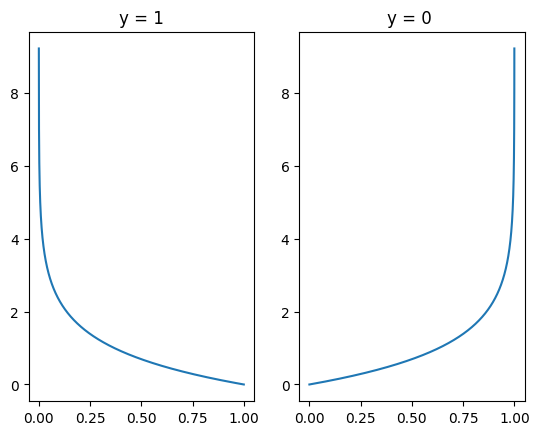

In [61]:
import matplotlib.pyplot as plt

X = [x / 10000 for x in range(1,10000)]

fig, (ax1,ax2) = plt.subplots(1,2)

ax1.plot (X , [neg_log_likelihood(1,x) for x in X])
ax1.set_title('y = 1')

ax2.plot (X , [neg_log_likelihood(0,x) for x in X])
ax2.set_title('y = 0 ')

plt.show()




### Interpretation

As we can see, the more wrong the prediction, the higher the calculated error. The Log Loss function therefore "punished" wrongdoing more than it rewards "rightdoing".



<h2 align = center> <font color = "EF2058">Finding Error </font></h2>



To calculate the overall error of our whole data set we sum up each individual Log Loss calculation and average it:

$$

Cost = - \frac {1}{n} \sum_{i=1}  (y_i log(\sigma(\beta_{xi})) + (1 - y_i) log(1 - \sigma(\beta_{xi})))


$$

### Implementation

In [62]:
def error (ys , ys_pred):
    if len(ys) == len(ys_pred):
        dataLen = len(ys)
        total = sum([neg_log_likelihood(y,y_pred) for y , y_pred in zip(ys,ys_pred)])
        return (1/dataLen)*total
    

<h2 align = center> <font color = "158900">Optimizing via Gradient Descent</font></h2>





Gradient descent is an optimization algorithm used to find the minimum of a function. It works by iteratively improving an estimate of the function's minimum by taking steps proportional to the negative of the gradient (or approximate gradient) of the function at the current estimate.

The general idea behind gradient descent is to start from an initial guess and gradually move towards the direction of the steepest descent of the function. This process is repeated iteratively until the function converges

Now the last missing piece we need to implement is the optimization step. What we want at the end of the day is a Logistic Regression model with the 
β parameters which in combination with x values produce the most accurate prediction for any y value

Given that we can calculate error of our model produced with its parameters Beta and we can iteratively change beta parameters until we reach at the point where our model can't improve.

Calculating the gradient is done by computing the partial derivatives of the Log Loss function with respect to the individual x_ij values in our x i
vector.

Here's the mathematical representation:

$$

\frac {\partial C}{\partial x * ij} = \frac {1}{n} \sum_{i=1}  (\sigma(\beta_{xi } * i) - y_i) x * ij


$$


### Implementation

In [288]:
gradient = [0 for _ in range (len(beta))]
for x , y in zip(xs,ys):
    err = squish(beta,x)-y
    for i , x_i in enumerate (x):
        gradient[i] += err * x_i

gradient = [1/len(x) * g_i for g_i in gradient]

We finally got all the pieces in place! Let's grab some data and use the Logistic Regression model to classify it!

<h1 align = center> <font color = "13A7EC">Importing Necessary Libraries </font></h1>

In [75]:
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import StandardScaler
import random



<h1 align = center> <font color = "9731E7">Importing Dataset</font></h1>

In [252]:
## Importing Dataset

data = pd.read_csv('student_performance.csv')


<h1 align = center> <font color = "A0E81B">Exploring Data</font></h1>


### Dataset columns

In [246]:
data.columns

Index(['Student IQ', 'Time Spent on Studies', 'Pass'], dtype='object')

### Columns Datatypes

In [240]:
data.dtypes

Student IQ                 int32
Time Spent on Studies    float64
Pass                       int32
dtype: object

### Checking Data Size

In [241]:
len(data)

500

### Checking Null Values

In [242]:
data.isnull().sum()

Student IQ               0
Time Spent on Studies    0
Pass                     0
dtype: int64

### Printing Data


In [244]:
data.head()

,Student IQ,Time Spent on Studies,Pass
0,108,5.113424,0
1,121,5.015163,0
2,98,7.982952,0
3,84,6.499639,0
4,112,7.019669,0


Now We are ready for model building

## Model Creation

In [253]:
xs= data.drop('Pass', axis = 1)
ys = data['Pass']




## Plotting

[]

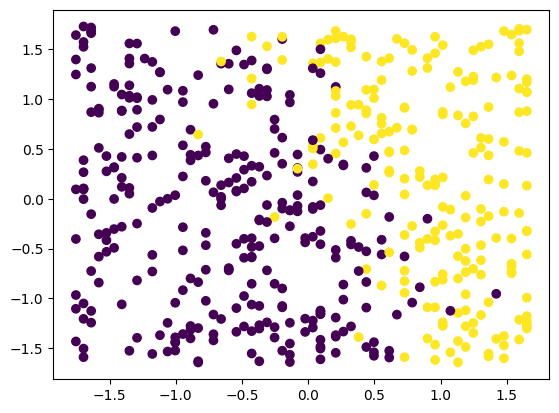

In [269]:
x1s =[x[1] for x in xs]
x2s = [x[2] for x in xs]
plt.scatter(x1s,x2s,c = ys)
plt.plot()

You might recall from the beginning of the post that we applied a trick where we prepend every x vector with a 1 and prepend the b to the 
β vector in order to make it possible to use the dot-product (which is a simpler calculation).

The following code prepends a 1 to every x vector so that we can leverage the computation trick later on:

In [256]:
xs.insert(0,"Ones",1)



In [259]:
xs

,Ones,Student IQ,Time Spent on Studies
0,1,108,5.113424
1,1,121,5.015163
2,1,98,7.982952
3,1,84,6.499639
4,1,112,7.019669
...,...,...,...
495,1,119,8.212573
496,1,94,1.106317
497,1,93,8.464523
498,1,82,1.274887


### Standardization using z-score

In [260]:
scaler = StandardScaler()
xs = scaler.fit_transform(xs)

In [229]:
xs

array([[ 0.        , -0.20808917, -0.13796959],
       [ 0.        , -0.97900085, -0.4175358 ],
       [ 0.        , -0.30756164, -0.49118022],
       ...,
       [ 0.        ,  1.34616826,  0.47820635],
       [ 0.        ,  0.52552034,  0.39184635],
       [ 0.        , -0.14591887, -0.13796959]])

In [285]:
beta = [random.random() / 10 for _ in range(len(data.columns))]

print(f'Starting with "beta": {beta}')

epochs: int = 5000
learning_rate: float = 0.1

for epoch in range(epochs):
    # Calculate the "predictions" (squishified dot product of `beta` and `x`) based on our current `beta` vector
    ys_pred= [squish(beta, x) for x in xs]

    # Calculate and print the error
    if epoch % 1000 == True:
        loss: float = error(ys, ys_pred)
        print(f'Epoch {epoch} --> loss: {loss}')

    # Calculate the gradient
    grad= [0 for _ in range(len(beta))]
    for x, y in zip(xs, ys):
        err: float = (squish(beta, x)) - y
        for i, x_i in enumerate(x):
            grad[i] += (err * x_i)
    grad = [1 / len(x) * g_i for g_i in grad]

    # Take a small step in the direction of greatest decrease
    beta = [b + (gb * -learning_rate) for b, gb in zip(beta, grad)]

print(f'Best estimate for "beta": {beta}')

Starting with "beta": [0.08739490156029701, 0.06555886170964956, 0.08894277313683543]
Epoch 1 --> loss: 0.29590121425997584
Epoch 1001 --> loss: 0.24929106165712966
Epoch 2001 --> loss: 0.24929106165712966
Epoch 3001 --> loss: 0.24929106165712966
Epoch 4001 --> loss: 0.24929106165712966
Best estimate for "beta": [np.float64(0.08739490156029701), np.float64(3.82395046860995), np.float64(1.4117497720506713)]


Now that our model trained, we can check our model accuracy. For this calculations we'll set the threshold to 0.5 which means that every value above this threshold our model produces is considered a 1 and every value below this threshold is considered a 0.


In [286]:
total = len(ys)
threshold = 0.5
truePositive = 0
trueNegative = 0
falsePositive = 0
falseNegative = 0


for i in range(1, len(xs)):
    x = xs[i]
    y = ys.iloc[i]
    pred = squish(beta,x)
    y_pred = 1

    if pred < threshold:
        y_pred = 0

    if y == 1 and y_pred == 1:
        truePositive += 1
    elif y == 0 and y_pred == 0:
        trueNegative += 1
    elif y == 1 and y_pred == 0:
        falseNegative += 1
    else:
        falsePositive += 1

print(f"True Positive :{truePositive}")
print(f"True Negative :{trueNegative}")
print(f"False Positive :{falsePositive}")
print(f"False Negative :{falseNegative}")

accuracy = (truePositive + trueNegative) / total
print(f"Accuracy :{accuracy}")

precision = truePositive / (truePositive + falsePositive)
print(f"Precision :{precision}")

recall = truePositive / (truePositive + falseNegative)
print(f"Recall :{recall}")

f1_score = 2 * ((precision * recall) / (precision + recall))
print(f"F1 Score :{f1_score}")

print(f"Error Rate : {(falsePositive+falseNegative)/total}")




True Positive :200
True Negative :241
False Positive :53
False Negative :5
Accuracy :0.882
Precision :0.7905138339920948
Recall :0.975609756097561
F1 Score :0.8733624454148472
Error Rate : 0.116


Let's Plot the decision boundry so that we can see how our model draw the line

### Plotting

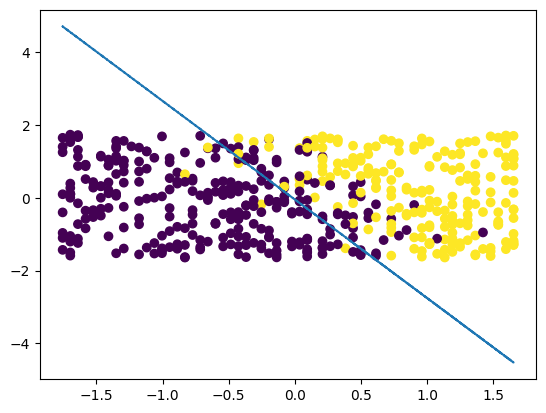

In [263]:
x1s = [x[1] for x in xs]
x2s = [x[2] for x in xs]

plt.scatter(x1s, x2s, c=ys)

# plt.axis([min(x1s), max(x1s),min(x2s),max(x2s)])

m = -(beta[1]/beta[2])
b = -(beta[0]/beta[2])

x2s = [m * x[1] + b for x in xs]

plt.plot(x1s,x2s,'--')


### Cross Checking 


Let's check the model decision line using scikit_learn logistic regression

In [287]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(xs, ys)

print(f'Intercept: {model.intercept_}')

print(f'Coefficients: {model.coef_}')

print('Accuracy:',model.score(xs,ys))





Intercept: [-1.33793781]
Coefficients: [[0.         4.22902975 1.48506429]]
Accuracy: 0.922


### Plotting

Model Line Using Scikit_Learn Logistic Regression

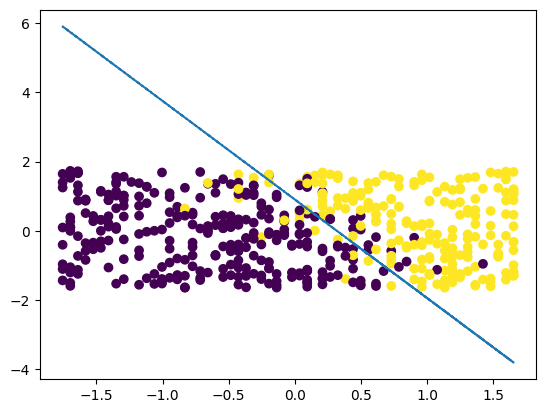

In [278]:


x1s = [x[1] for x in xs]
x2s = [x[2] for x in xs]

plt.scatter(x1s, x2s, c=ys)

m = -(model.coef_[0][1]/model.coef_[0][2])
b = -(model.intercept_/model.coef_[0][2])

x2s = [m * x[1] + b for x in xs]

plt.plot(x1s,x2s,'--')





<h1 align = center><font color = "13FB00">Conclusion </font></h1>

As we can see manually implemented and logistic regression implemented through scikitlearn have almost same decision line but the model implemented using the scikitlearn have better performance , we can also achieve better performance of our manually implemented logistic regression by tuning the hyperparameters.